# **TITLE : Mileage_Predection**



# **Objective**
To predect the mileage.

#  **Data Source**
GITHUB : "https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv
"

# **Import Library**

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Import** **Data**

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

#  **Describe Data**

In [45]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [47]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [48]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [49]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [50]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

# Drop non-numeric columns
numeric_df = df.drop(columns=non_numeric_columns)

# Calculate correlation on the numeric DataFrame
correlation_matrix = numeric_df.corr()


In [51]:
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# **Remove Missing Values**

In [52]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [53]:
df = df.dropna()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


#  **Data Visualization**

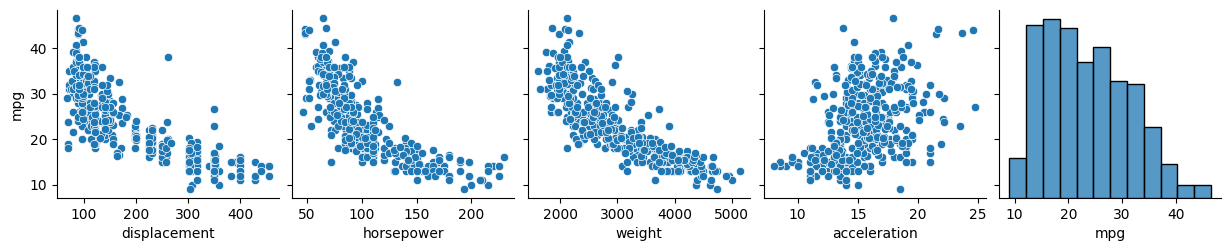

In [55]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars='mpg')

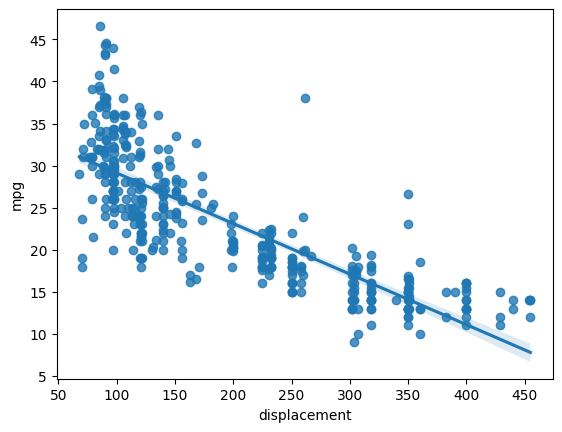

In [56]:
sns.regplot (x='displacement', y = 'mpg', data = df);

<Axes: xlabel='acceleration', ylabel='mpg'>

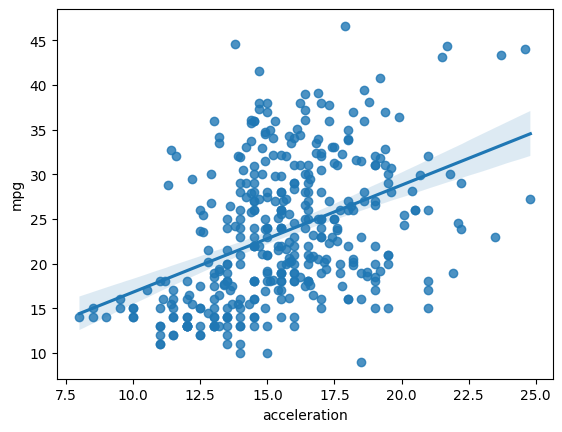

In [57]:
sns.regplot(x='acceleration',y='mpg',data=df)

<Axes: xlabel='horsepower', ylabel='mpg'>

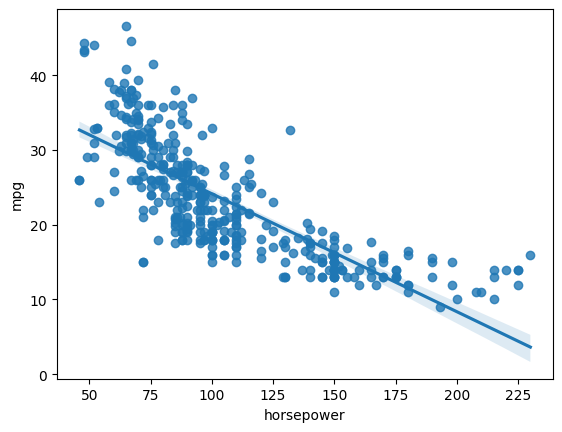

In [58]:
sns.regplot(x='horsepower',y='mpg',data=df)

<Axes: xlabel='displacement', ylabel='mpg'>

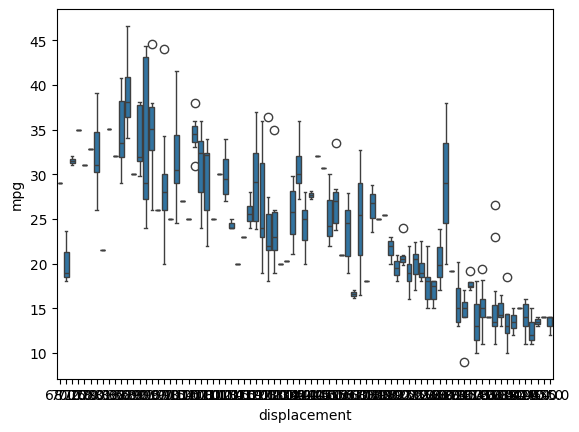

In [59]:
sns.boxplot(data=df,x='displacement', y = 'mpg')

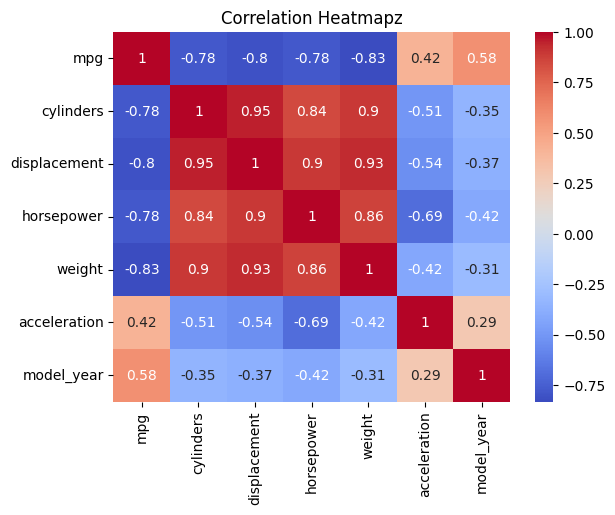

In [60]:
sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmapz")
plt.show()

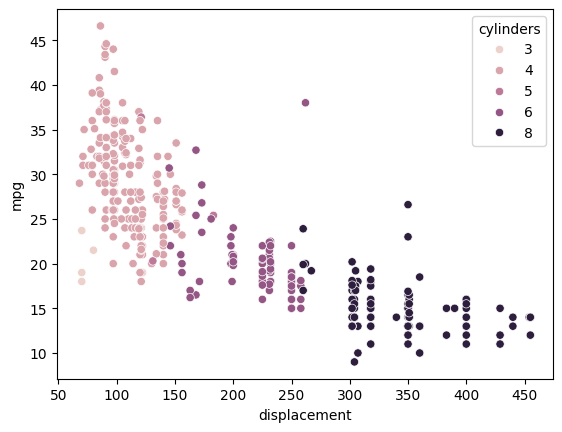

In [61]:
sns.scatterplot(data=df, x="displacement", y="mpg", hue="cylinders")
plt.show()

#  **Defining Target Variable (y) and Feature Variables (X)**

In [62]:
X = df[['acceleration','displacement','horsepower','weight']]

In [63]:
X.head()

,acceleration,displacement,horsepower,weight
0,12.0,307.0,130.0,3504
1,11.5,350.0,165.0,3693
2,11.0,318.0,150.0,3436
3,12.0,304.0,150.0,3433
4,10.5,302.0,140.0,3449


In [64]:
y = df['mpg']

In [65]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [66]:
X.info(),y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   acceleration  392 non-null    float64
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.3 KB
<class 'pandas.core.series.Series'>
Index: 392 entries, 0 to 397
Series name: mpg
Non-Null Count  Dtype  
--------------  -----  
392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


(None, None)

#  **Train Test Split**

In [67]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.7,random_state = 2529)

In [74]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((117, 4), (275, 4), (117,), (275,))

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform (X_test)

In [ ]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

#  **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression
new_model = LinearRegression()
new_model.fit(X_train, y_train)
predictions = new_model.predict(X_test)

In [ ]:
new_model.intercept_

44.00934827526888

In [ ]:
new_model.coef_

array([ 0.09710601, -0.01024643, -0.01668317, -0.00610645])

In [ ]:
new_model.intercept_

44.00934827526888

In [ ]:
new_model.coef_

array([ 0.09710601, -0.01024643, -0.01668317, -0.00610645])

In [ ]:
predict = new_model.predict(X_test)

In [ ]:
predict

array([18.83232615, 14.67689764, 13.90916105, 23.48706843, 30.25543552,
       23.46671071, 27.28163576, 24.60121655, 14.40764431, 10.81692289,
       24.30874146, 27.9134718 , 31.87135668, 31.42289874, 17.69562279,
       19.09989244, 28.60563403, 32.67685665, 31.45063299, 27.35959705,
       18.46314382, 22.19920123, 26.2982957 , 33.03335117, 20.48801313,
        9.54351607, 22.40016431, 18.3349025 , 24.90567933, 17.72005616,
       23.00135022, 16.88953804, 10.57530881, 30.26775706, 20.13255834,
       29.29639211, 24.89285218, 21.37238187,  9.68643504, 12.73666785,
       20.95618571, 20.11237202,  6.42862798, 17.31748152, 22.17367358,
       29.47288305, 13.72946495, 25.84603835, 30.3260242 , 22.49617884,
       21.32125793, 16.21218023, 23.82532354, 30.39683971,  9.25868474,
       10.87274956, 28.51433586, 23.14656115, 20.00708585, 31.00621369,
       20.4572209 , 27.13086597, 22.2195037 , 13.80505274, 25.30799492,
       27.41913866, 15.02111221, 24.0510285 , 31.58339665, 14.71

#  **Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
r2_score(y_test,predict)

0.6923289624942407

In [ ]:
mean_absolute_error(y_test,predict)

3.35640870993988

In [ ]:
mean_squared_error(y_test,predict)

18.6690613030679

In [ ]:
import numpy as np
np.sqrt(mean_squared_error(y_test,predict))


4.32077091536544

# **Prediction**

In [ ]:
data={
    'acceleration':[15.0],
    'displacement':[307.0],
    'horsepower':[200.0],
    'weight':[3530]
     }
final_data = pd.DataFrame(data)
final_value = new_model.predict(final_data)
print(f"Mielage : {final_value[0]}")

Mielage : 17.427872404140437


#  **Explaination**

The mileage value depends mainly on acceleration,displacement,horsepower,weight. It is all in linear manner so LinearRegression is used.A smaple example is done at last to find the mileage value.

In [ ]:
import pickle

In [ ]:
with open('pickle_file.pkl','wb') as file:
    pickle.dump(new_model,file)
with open('pickle_file.pkl','rb') as file:
    clf = pickle.load(file)